## Observations and Insights 

1. Weight and tumor mass are very closely correlated, but were the mice weighed at the beginning or end of the study? Obviously those with larger tumors will weigh more, but if they were weighed at the beginning of the study... it's very interesting to see that the larger mice grew larger tumors on average.

2. Ketapril has the highest variance and standard deviation, which means it has the largest range between its values. It worked well for some but not for others.

3. Mouse r944's journey is interesting to see. Its tumor had a major shrink, and then it started growing again. As a scientist, I would be worried about those later affects.

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as sts
import numpy as np

#pd.set_option('display.max_rows', None)

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
df = pd.merge(mouse_metadata,study_results, on='Mouse ID', how='outer')
# Display the data table for preview
df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [3]:
# Check the number of mice
df["Mouse ID"].count()

1893

In [5]:
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint 
dupe_mice_df = pd.DataFrame(df, columns=['Mouse ID', 'Timepoint'])

# Find the duplicates
find_the_dupes = dupe_mice_df[dupe_mice_df.duplicated()].index

In [6]:
# Create a clean data frame by dropping the duplicate mouse by its ID
df.drop(find_the_dupes, inplace=True)

In [7]:
# Check the number of mice in the clean data frame to compare to original data frame
df["Mouse ID"].count()

1888

## Summary Statistics

In [8]:
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
#########################################################################################################

# Use GroupBy to group mice by Drug Regimen in new data frame
summary_stats_df = df.groupby("Drug Regimen")

# Find the mean, median, variance, standard deviation, and SEM of the tumor volume
summary_mean = round(summary_stats_df['Tumor Volume (mm3)'].mean(),2)
summary_median = round(summary_stats_df['Tumor Volume (mm3)'].median(),2)
summary_variance = round(summary_stats_df['Tumor Volume (mm3)'].var(),2)
summary_stddev = round(summary_stats_df['Tumor Volume (mm3)'].std(),2)
summary_sem = round(summary_stats_df['Tumor Volume (mm3)'].sem(),2)


# Assemble the resulting series into a single summary data frame
summary_table = pd.DataFrame({'Mean': summary_mean, 'Median': summary_median, 'Variance': summary_variance, 
                               'Std. Dev.': summary_stddev, 'SEM': summary_sem
                              })

# Print the new summary data frame
summary_table

,Mean,Median,Variance,Std. Dev.,SEM
Drug Regimen,,,,,
Capomulin,40.68,41.56,24.95,4.99,0.33
Ceftamin,52.59,51.78,39.29,6.27,0.47
Infubinol,52.88,51.82,43.13,6.57,0.49
Ketapril,55.24,53.70,68.55,8.28,0.60
Naftisol,54.33,52.51,66.17,8.13,0.60
Placebo,54.03,52.29,61.17,7.82,0.58
Propriva,52.39,50.91,43.14,6.57,0.53
Ramicane,40.22,40.67,23.49,4.85,0.32
Stelasyn,54.23,52.43,59.45,7.71,0.57


In [9]:
# Using the aggregation method, produce the same summary statistics in a single line
print(round(df.groupby(['Drug Regimen']).agg({'Tumor Volume (mm3)':['mean', 'median', 'var', 'std', 'sem']}),2))

             Tumor Volume (mm3)                          
                           mean median    var   std   sem
Drug Regimen                                             
Capomulin                 40.68  41.56  24.95  4.99  0.33
Ceftamin                  52.59  51.78  39.29  6.27  0.47
Infubinol                 52.88  51.82  43.13  6.57  0.49
Ketapril                  55.24  53.70  68.55  8.28  0.60
Naftisol                  54.33  52.51  66.17  8.13  0.60
Placebo                   54.03  52.29  61.17  7.82  0.58
Propriva                  52.39  50.91  43.14  6.57  0.53
Ramicane                  40.22  40.67  23.49  4.85  0.32
Stelasyn                  54.23  52.43  59.45  7.71  0.57
Zoniferol                 53.24  51.82  48.53  6.97  0.52


## Bar and Pie Charts

Text(0.5, 1.0, 'Total Number of Measurements Taken on Each Drug Regimen')

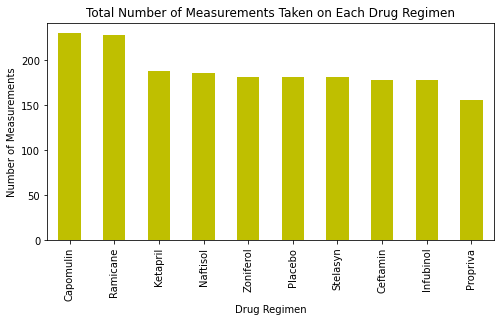

In [10]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pandas.
#########################################################################################################

# Set the chart size
plt.figure(figsize=(8,4))

# Plot the bar graph
bar_plot = df['Drug Regimen'].value_counts().plot.bar(color="y", width=0.5)

# Add labels to graph
bar_plot.set_xlabel("Drug Regimen")
bar_plot.set_ylabel("Number of Measurements")
bar_plot.set_title("Total Number of Measurements Taken on Each Drug Regimen")

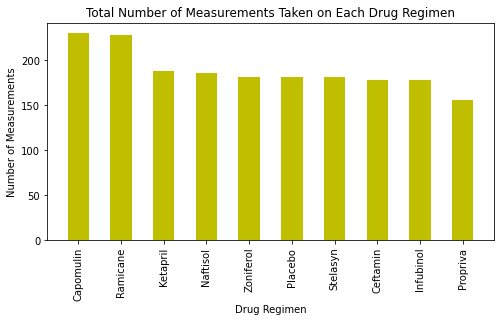

In [11]:
# Generate a bar plot showing number of data points for each treatment regimen using pyplot
#########################################################################################################

# Set the chart size
plt.figure(figsize=(8,4))

# Get values of Drug Regimens
counts = df['Drug Regimen'].value_counts()

# Get number of Drug Regimens
x_axis = np.arange(len(counts))

# Plot the above values into a bar chart
plt.bar(x_axis, counts, color="y", width=0.5)

# Get labels for x-axis (drug regimens)
ticks = [v for v in x_axis]
plt.xticks(ticks, counts.index.values)

# Rotate x-axis labels so they are readable to user
plt.xticks(rotation=90)

# Add labels to graph
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Measurements")
plt.title("Total Number of Measurements Taken on Each Drug Regimen")

# Print graph
plt.show()

<AxesSubplot:title={'center':'Distribution of Female vs. Male Mice'}, ylabel='Sex'>

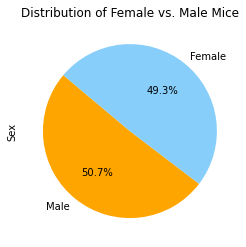

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
#########################################################################################################

# Set labels to value options in column "Sex"
labels = df["Sex"].unique()

# Set colors
colors = ["orange", "lightskyblue"]

# Plot pie chart
pie_plot = df['Sex'].value_counts().plot.pie(labels=labels, colors=colors, shadow=False, startangle=140, autopct="%1.1f%%")

# Set title
pie_plot.set_title("Distribution of Female vs. Male Mice")

# Print chart
pie_plot

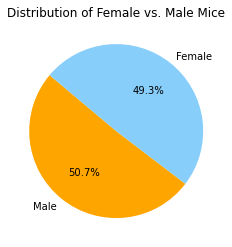

In [13]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
#########################################################################################################

# Set labels to value options in column "Sex"
labels = df['Sex'].unique()

# Plot pie chart
plt.pie((df['Sex'].value_counts()), labels=labels, colors=colors, shadow=False, startangle=140, autopct="%1.1f%%")

# Set title
plt.title("Distribution of Female vs. Male Mice")

# Print chart
plt.show()

## Quartiles, Outliers and Boxplots

In [14]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
#########################################################################################################

# Get the last (greatest) timepoint for each mouse
timepoint_df = pd.DataFrame(df.groupby('Mouse ID')['Timepoint'].max().sort_values())

# Rename columns so they do not match with other data frame
clean_timepoint_df = timepoint_df.reset_index().rename(columns={'Timepoint': 'max_timepoint'})

# Merge this group data frame with the original data frame to get the tumor volume at the last timepoint
merged_df = pd.merge(df, clean_timepoint_df, on='Mouse ID')

# Print the data frame
merged_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites,max_timepoint
0,k403,Ramicane,Male,21,16,0,45.000000,0,45
1,k403,Ramicane,Male,21,16,5,38.825898,0,45
2,k403,Ramicane,Male,21,16,10,35.014271,1,45
3,k403,Ramicane,Male,21,16,15,34.223992,1,45
4,k403,Ramicane,Male,21,16,20,32.997729,1,45
...,...,...,...,...,...,...,...,...,...
1883,z969,Naftisol,Male,9,30,25,63.145652,2,45
1884,z969,Naftisol,Male,9,30,30,65.841013,3,45
1885,z969,Naftisol,Male,9,30,35,69.176246,4,45
1886,z969,Naftisol,Male,9,30,40,70.314904,4,45


In [32]:
# Put treatments into a list for for loop (and later for plot labels)
#########################################################################################################

# Put the regimens into a list
regimens = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Create empty list to fill with tumor volume data (for plotting)
drug_values = []

# for loop to gather data
# for each regimen in regimens list...
for regimen in regimens:
    
    #...get the name
    temp_df = merged_df.loc[merged_df['Drug Regimen'] == regimen]
    
    #...locate the max timepoint rows
    volume_df = temp_df.loc[temp_df['Timepoint'] == temp_df['max_timepoint']]
    
    #...locate the rows which contain mice on each regimen and get the tumor volumes
    values = volume_df['Tumor Volume (mm3)']
    
    #...add the volume data to the drug_values list for plotting
    drug_values.append(values)

    #...calculate and print the IQR
    quartiles = values.quantile([0.25, 0.5, 0.75])
    lower_quartile = quartiles[0.25]
    upper_quartile = quartiles[0.75]
    IQR = upper_quartile - lower_quartile
    print(f'IQR for {regimen}: {IQR}')

    #...calculate and print the upper/lower bounds
    lower_bound = lower_quartile - (1.5 * IQR)
    upper_bound = upper_quartile + (1.5 * IQR)
    print(f'Lower Bound for {regimen}: {lower_bound}')
    print(f'Upper Bound for {regimen}: {upper_bound}')
    
    #...calculate and print the number of outliers on each regimen
    outliers = (values.loc[(volume_df['Tumor Volume (mm3)'] >= upper_bound) | (volume_df['Tumor Volume (mm3)'] <= lower_bound)]).count()
    print(f'Number of {regimen} outliers: {outliers}')
    print() 

IQR for Capomulin: 7.781863460000004
Lower Bound for Capomulin: 20.70456164999999
Upper Bound for Capomulin: 51.83201549
Number of Capomulin outliers: 0

IQR for Ramicane: 9.098536719999998
Lower Bound for Ramicane: 17.912664470000003
Upper Bound for Ramicane: 54.30681135
Number of Ramicane outliers: 0

IQR for Infubinol: 11.477135160000003
Lower Bound for Infubinol: 36.83290494999999
Upper Bound for Infubinol: 82.74144559000001
Number of Infubinol outliers: 1

IQR for Ceftamin: 15.577752179999997
Lower Bound for Ceftamin: 25.355449580000002
Upper Bound for Ceftamin: 87.66645829999999
Number of Ceftamin outliers: 0



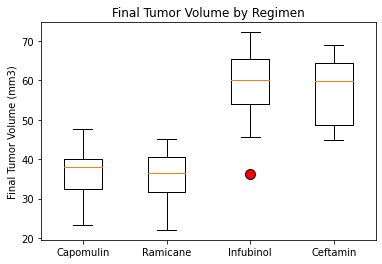

In [20]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
#########################################################################################################

# Change the colors on the outliers so they stand out
outliers = dict(marker="o", markerfacecolor="r", markersize=10)

# Plot the drug values into a box plot
plt.boxplot(drug_values, flierprops=outliers)

# Add labels to plot
plt.title("Final Tumor Volume by Regimen")
plt.xticks([1, 2, 3, 4], ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin'])
plt.ylabel("Final Tumor Volume (mm3)")

# Print the plot
plt.show()

## Line and Scatter Plots

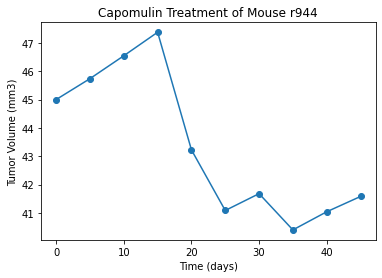

In [17]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
#########################################################################################################

# Pull the single mouse data into new data frame
mouse_df = df.loc[df['Mouse ID'] == 'r944']

# Plot the single mouse timepoint and tumor volume
plt.plot(mouse_df['Timepoint'], mouse_df['Tumor Volume (mm3)'], marker = 'o')

# Add labels to plot
plt.title("Capomulin Treatment of Mouse r944")
plt.xlabel("Time (days)")
plt.ylabel("Tumor Volume (mm3)")

# Print the plot
plt.show()

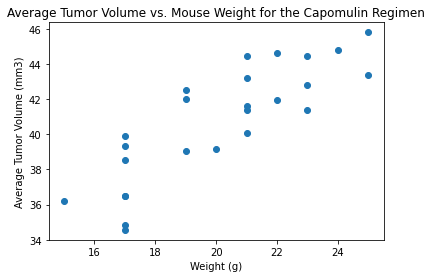

In [18]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
#########################################################################################################

# Pull data for the regimen Capomulin into new data frame
capomulin_df = df.loc[df['Drug Regimen'] == 'Capomulin']

# Group the Capomulin data by Mouse ID, then find the average of the tumor volumes by mouse
# and put into new data frame
avg_volume = pd.DataFrame(capomulin_df.groupby('Mouse ID')['Tumor Volume (mm3)'].mean().sort_values())

# Rename column so it does not match with other data frame
avg_volume.reset_index()
avg_volume = avg_volume.rename(columns={'Tumor Volume (mm3)': 'Average Tumor Volume'})

# Merge average volume data frame with Capomulin data frame
avg_volume_merge = pd.merge(capomulin_df, avg_volume, on='Mouse ID')

# Drop any duplicates in this new data frame
avg_volume_df = avg_volume_merge[['Weight (g)', 'Average Tumor Volume']].drop_duplicates()

# Set the x and y axis for scatter plot
x_axis = avg_volume_df['Weight (g)']
y_axis = avg_volume_df['Average Tumor Volume']

# Plot the data
plt.scatter(x_axis, y_axis)

# Add labels to plot
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.title("Average Tumor Volume vs. Mouse Weight for the Capomulin Regimen")

# Print the plot
plt.show()

## Correlation and Regression

The correlation coefficient is 0.84.


<function matplotlib.pyplot.show(close=None, block=None)>

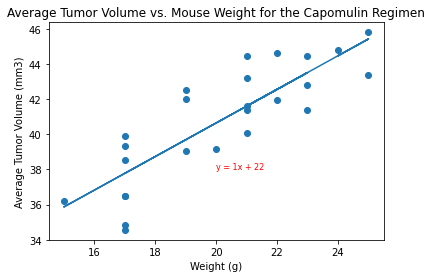

In [67]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
#########################################################################################################

# Find and print the correlation coefficient (I rounded it to make it easy to read)
correlation = sts.pearsonr(x_axis, y_axis)
print(f"The correlation coefficient is {round(correlation[0],2)}.")

# Find linear data by using x and y axis
(slope, intercept, rvalue, pvalue, stderr) = sts.linregress(x_axis, y_axis)

# Calculate the regression line
regression_line = x_axis * slope + intercept

# Calculate the linear equation
linear_equation = "y = " + str(round(slope)) + "x + " + str(round(intercept))

# Plot the scatterplot data
plt.scatter(x_axis, y_axis)

# Plot the regression line on top of scatterplot
plt.plot(x_axis, regression_line)

# Print the linear equation on the scatterplot
plt.annotate(linear_equation, (20,38), fontsize=8, color="red")

# Add labels to plot
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.title("Average Tumor Volume vs. Mouse Weight for the Capomulin Regimen")

# Print the plot
plt.show